<a href="https://colab.research.google.com/github/shalinshukla/programming-of-data-science/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# URLs for confirmed cases and deaths
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

# Read data into dataframes
confirmed_cases_df = pd.read_csv(confirmed_cases_url)
deaths_df = pd.read_csv(deaths_url)

# Drop unnecessary columns (Latitude, Longitude, etc.)
confirmed_cases_df = confirmed_cases_df.drop(columns=['Lat', 'Long', 'Province/State'])
deaths_df = deaths_df.drop(columns=['Lat', 'Long', 'Province/State'])

# Aggregate and sum on a global level
global_confirmed_cases = confirmed_cases_df.sum(axis=0)[3:]  # Starting from the 4th column (dates)
global_deaths = deaths_df.sum(axis=0)[3:]  # Starting from the 4th column (dates)

# Create a new dataframe
global_data = pd.DataFrame({
    'Date': global_confirmed_cases.index,
    'Global_Confirmed_Cases': global_confirmed_cases.values,
    'Global_Deaths': global_deaths.values
})

# Display the resulting dataframe
#print(global_data)
global_data

,Date,Global_Confirmed_Cases,Global_Deaths
0,1/24/20,944,26
1,1/25/20,1437,42
2,1/26/20,2120,56
3,1/27/20,2929,82
4,1/28/20,5580,131
...,...,...,...
1136,3/5/23,676024901,6877749
1137,3/6/23,676082941,6878115
1138,3/7/23,676213378,6879038
1139,3/8/23,676392824,6880483


In [7]:
pip install alpha_vantage

In [8]:
import requests

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
api_key = 'E193JDO3TYBKQOZM'

# Symbol for the stock you want to retrieve data for
symbol = 'CRM'  # Example: Salesforce Inc.

# Date for which you want to get the daily high and low prices
date = '2023-11-24'  # Example: November 24, 2023

# Alpha Vantage API endpoint for daily stock prices
endpoint = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}'

try:
    # Make the API request
    response = requests.get(endpoint)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        data = response.json()

        # Check if the date is available in the response
        if date in data['Time Series (Daily)']:
            # Extract high and low prices for the specified date
            high_price = float(data['Time Series (Daily)'][date]['2. high'])
            low_price = float(data['Time Series (Daily)'][date]['3. low'])

            print(f"For {symbol} on {date}:")
            print(f"High Price: {high_price}")
            print(f"Low Price: {low_price}")
        else:
            print(f"No data available for {symbol} on {date}")
    else:
        print(f"Error: {response.status_code} - {response.text}")
except Exception as e:
    print(f"An error occurred: {e}")

For CRM on 2023-11-24:
High Price: 224.49
Low Price: 222.12


In [9]:
####For IBM - American Market
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import time

api_key = 'E193JDO3TYBKQOZM'
# Create an instance of the TimeSeries class

#american market
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='IBM', outputsize='full')

for date in global_data['Date']:
  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]

  global_data.loc[global_data['Date'] == date, 'IBM_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'IBM_Low'] = low_price


print(global_data[['Date', 'IBM_High', 'IBM_Low']])

         Date  IBM_High  IBM_Low
0     1/24/20    143.92  140.460
1     1/25/20      0.00    0.000
2     1/26/20      0.00    0.000
3     1/27/20    140.07  138.100
4     1/28/20    140.47  138.750
...       ...       ...      ...
1136   3/5/23      0.00    0.000
1137   3/6/23    130.86  129.590
1138   3/7/23    130.42  128.190
1139   3/8/23    128.74  127.545
1140   3/9/23    128.53  125.980

[1141 rows x 3 columns]


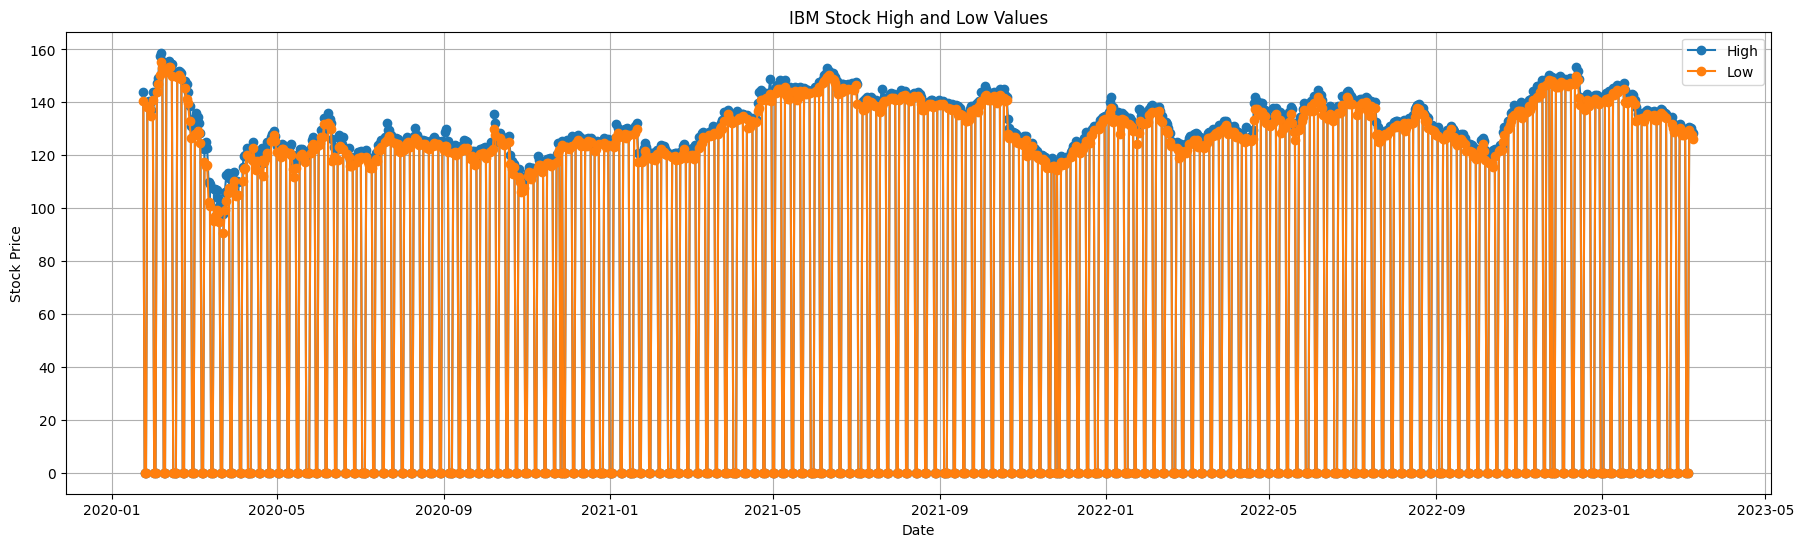

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating DataFrame from the sample data

# Convert 'Date' column to datetime
global_data['Date'] = pd.to_datetime(global_data['Date'])

# Plotting the high and low values
plt.figure(figsize=(22, 6))
plt.plot(global_data['Date'], global_data['IBM_High'], label='High', marker='o')
plt.plot(global_data['Date'], global_data['IBM_Low'], label='Low', marker='o')

# Customize the plot
plt.title('IBM Stock High and Low Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()